In [ ]:
#!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 


# Clasificador de imágenes de perros y gatos
## Carolina Herrera Martinez 

Este clasificador se encarga de diferenciar entre perros y gatos a través de una red neuronal profunda.

Para crear el modelo se utiliza como base el modelo VGG16, cambiando solamente la parte final para adecuarla a una clasificación binaria (perro y gato)

Como primer paso, se importan las imágenes a utilizar en el modelo

In [73]:
from tensorflow.keras import utils
data_dir = "C:/Users/Hunter/Downloads/train"
batch_size = 16
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.5,
  subset="training",
  seed=123,
  image_size=(224, 224),
  batch_size=batch_size)

Found 23998 files belonging to 2 classes.
Using 11999 files for training.


In [74]:
data_dir = "C:/Users/Hunter/Downloads/test1"
batch_size = 16
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(224, 224),
  batch_size=batch_size)

Found 1002 files belonging to 2 classes.
Using 200 files for validation.


In [ ]:
#Para la version inicial del modelo se utilizó una red secuencial creada manualmente

In [ ]:
model = tf.keras.models.Sequential([

tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
tf.keras.layers.MaxPooling2D(2, 2),

tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Flatten(),

tf.keras.layers.Dense(512, activation='relu'),

tf.keras.layers.Dense(1, activation='sigmoid')])
model.compile(loss='binary_crossentropy',
optimizer=tf.keras.optimizers.RMSprop(),
metrics='accuracy')
history = model.fit(train_ds,
steps_per_epoch=8,
epochs=10,
verbose=1,
validation_data = val_ds,
validation_steps=8 )

Al entrenar este modelo se obtienen precisiones que no superan el 60%
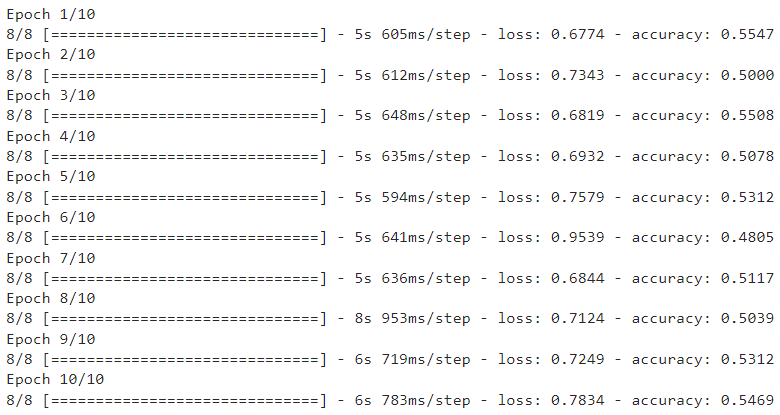

Ahora para mejorar el modelo nos apoyaremos del modelo exsitente llamado VGG16. Esta red neuronal profunda podria mejorar nuestros resultados. Consideraremos que el cambio fue exitoso si el accuracy aumenta en un 30% o más.

In [151]:
# importar vgg16
mymodel = keras.applications.VGG16(include_top=True)
mymodel.trainable=False

inicio_red =mymodel.layers[0].input
#agregar una capa densa al final 
dos_antes_del_final_red =mymodel.layers[-2].output
#usamos una activación de sigmoide para que vaya de 0 a 1 el resultado
final_personalizado =layers.Dense(1, activation = "sigmoid")(dos_antes_del_final_red)

#compilamos el modelo usando un algoritmo binario de cross entropy y un optimizador adam
megustanlosperritos = keras.Model(inicio_red,final_personalizado)
megustanlosperritos.compile(
    metrics=["accuracy"],
    loss=[keras.losses.BinaryCrossentropy()],
    optimizer=keras.optimizers.Adam(),
)

In [152]:
#megustanlosperritos.summary()

In [153]:
# hacemos fit al modelo
history = megustanlosperritos.fit(
train_ds,
steps_per_epoch=8,
epochs=5,
verbose=1,
validation_data = val_ds,
validation_steps=8 )

Epoch 1/5
8/8 [==============================] - 38s 5s/step - loss: 0.5258 - accuracy: 0.8047 - val_loss: 0.2159 - val_accuracy: 0.9297
Epoch 2/5
8/8 [==============================] - 41s 6s/step - loss: 0.2091 - accuracy: 0.9453 - val_loss: 0.2744 - val_accuracy: 0.9141
Epoch 3/5
8/8 [==============================] - 43s 6s/step - loss: 0.1334 - accuracy: 0.9297 - val_loss: 0.1675 - val_accuracy: 0.9219
Epoch 4/5
8/8 [==============================] - 50s 7s/step - loss: 0.1468 - accuracy: 0.9531 - val_loss: 0.1677 - val_accuracy: 0.9375
Epoch 5/5
8/8 [==============================] - 50s 7s/step - loss: 0.1941 - accuracy: 0.9453 - val_loss: 0.1407 - val_accuracy: 0.9453


Podemos ver que el accuracy mejoro en un 40% por lo que la mejora del modelo fue exitosa. Ahora que ya se tiene un modelo que cumple con las expectativas este modelo se guarda para poder ser utilizado posteriormente.

In [209]:
#guardamos el modelo
megustanlosperritos.save('perritos_y_ygatitos.h5')